In [27]:

import numpy as np
import pandas as pd
import os
import random

import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

# For reading in the data in various forms
from netCDF4 import Dataset
import xarray as xr




## Read in the Solar Wind Data

In [5]:
# Read in the solar wind data

base_dir = '/Users/ryanmcgranaghan/Documents/NSF_CHESS/github_pages/NSF_CHESS/'


#---------------------------------------------------------------------
# July 2012 near miss event
# https://drive.google.com/file/d/12wAidJ_oA17njyPMgYDUzIzUeJZYQP6q/view?usp=sharing
sw_file = os.path.join(base_dir,'data/historic_sw_data/July2012_nearmiss/July2012_IMF.txt')
f = open(sw_file)
sw_event = f.read().split('\n')
f.close()
sw_label = 'July 2012 near miss'



The event spans two days: July 23-25, 2012. We can divide up the three phases and epilogue based on the solar wind conditions: 
- Phase 1: July 23 00:00:00.000 to July 23 18:00:00.000
- Phase 2: July 23 18:00:00.000 to July 23 20:00:00.000
- Phase 3: July 23 20:00:00.000 to July 24 03:00:00.000
- Epilogue: July 24 03:00:00.000 onward

In [10]:
sw_event

['Year Month Day Hour Min Sec Msec Bx[nT] By[nT] Bz[nT] Vx[km/s] Vy[km/s] Vz[km/s] N[cm^(-3)] T[Kelvin]',
 '2012 7 23 0 0 0 0 0 -0.039815 0.0816 -483.1 -0.069115 498.37 5.8 10000',
 '2012 7 23 0 1 0 0 0 -0.081349 0.18562 -483.66 -0.05765 496.63 5.8 10000',
 '2012 7 23 0 2 0 0 0 -0.11447 0.28799 -484.22 0.23848 494.9 5.8 10000',
 '2012 7 23 0 3 0 0 0 -0.13719 0.38279 -484.78 0.47967 495.12 5.8 13246',
 '2012 7 23 0 4 0 0 0 -0.15438 0.48098 -485.34 0.77637 496.46 5.8 16558',
 '2012 7 23 0 5 0 0 0 -0.16966 0.58835 -485.9 1.2342 499.76 5.8 19989',
 '2012 7 23 0 6 0 0 0 -0.18998 0.69875 -485.9 1.4392 498.23 5.8 23538',
 '2012 7 23 0 7 0 0 0 -0.20976 0.80585 -485.9 1.6553 496.57 5.8 27207',
 '2012 7 23 0 8 0 0 0 -0.23091 0.90825 -485.9 1.9225 494.8 5.8 30995',
 '2012 7 23 0 9 0 0 0 -0.26602 1.0139 -485.9 2.2819 493.27 5.8 34901',
 '2012 7 23 0 10 0 0 0 -0.31145 1.1045 -485.9 2.6445 491.62 5.8 38555',
 '2012 7 23 0 11 0 0 0 -0.36143 1.2022 -486.12 2.925 499.97 5.8 41956',
 '2012 7 23 0 12 0 0

In [11]:
# Prepare solar wind data

yr_sw_event = [int(sw_event[l].split(' ')[0]) for l in range(1,len(sw_event)-1)]
mo_sw_event = [int(sw_event[l].split(' ')[1]) for l in range(1,len(sw_event)-1)]
dy_sw_event = [int(sw_event[l].split(' ')[2]) for l in range(1,len(sw_event)-1)]
hr_sw_event = [int(sw_event[l].split(' ')[3]) for l in range(1,len(sw_event)-1)]
mt_sw_event = [int(sw_event[l].split(' ')[4]) for l in range(1,len(sw_event)-1)]
se_sw_event = [int(sw_event[l].split(' ')[5]) for l in range(1,len(sw_event)-1)]

dt_sw_event = []
for d in range(len(yr_sw_event)):
    dt_sw_event.append(dt.datetime(yr_sw_event[d],mo_sw_event[d],dy_sw_event[d],hr_sw_event[d],mt_sw_event[d]))

Bx_sw_event = [float(sw_event[l].split(' ')[7]) for l in range(1,len(sw_event)-1)]
By_sw_event = [float(sw_event[l].split(' ')[8]) for l in range(1,len(sw_event)-1)]
Bz_sw_event = [float(sw_event[l].split(' ')[9]) for l in range(1,len(sw_event)-1)]

Vx_sw_event = [float(sw_event[l].split(' ')[10]) for l in range(1,len(sw_event)-1)]
Vy_sw_event = [float(sw_event[l].split(' ')[11]) for l in range(1,len(sw_event)-1)]
Vz_sw_event = [float(sw_event[l].split(' ')[12]) for l in range(1,len(sw_event)-1)]

N_sw_event = [float(sw_event[l].split(' ')[13]) for l in range(1,len(sw_event)-1)]
T_sw_event = [float(sw_event[l].split(' ')[14]) for l in range(1,len(sw_event)-1)]

pd_sw_event = pd.DataFrame(np.column_stack([dt_sw_event,Bx_sw_event,By_sw_event,Bz_sw_event,Vx_sw_event,Vy_sw_event,Vz_sw_event,N_sw_event,T_sw_event,]),columns=['datetimes', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz','N', 'T',])




In [12]:
pd_sw_event

,datetimes,Bx,By,Bz,Vx,Vy,Vz,N,T
0,2012-07-23 00:00:00,0.0,-0.039815,0.0816,-483.1,-0.069115,498.37,5.8,10000.0
1,2012-07-23 00:01:00,0.0,-0.081349,0.18562,-483.66,-0.05765,496.63,5.8,10000.0
2,2012-07-23 00:02:00,0.0,-0.11447,0.28799,-484.22,0.23848,494.9,5.8,10000.0
3,2012-07-23 00:03:00,0.0,-0.13719,0.38279,-484.78,0.47967,495.12,5.8,13246.0
4,2012-07-23 00:04:00,0.0,-0.15438,0.48098,-485.34,0.77637,496.46,5.8,16558.0
...,...,...,...,...,...,...,...,...,...
2875,2012-07-24 23:55:00,0.0,9.3581,-4.6881,-937.25,-113.17,812.09,1.0,1059000.0
2876,2012-07-24 23:56:00,0.0,9.3629,-4.6673,-937.6,-114.61,814.05,1.0,1023700.0
2877,2012-07-24 23:57:00,0.0,9.3697,-4.6399,-937.94,-115.59,815.77,1.0,990170.0
2878,2012-07-24 23:58:00,0.0,9.3626,-4.6324,-938.29,-114.0,812.87,1.0,958480.0


Text(0.5, 1.0, 'Solar Wind Temperature\n[K]')

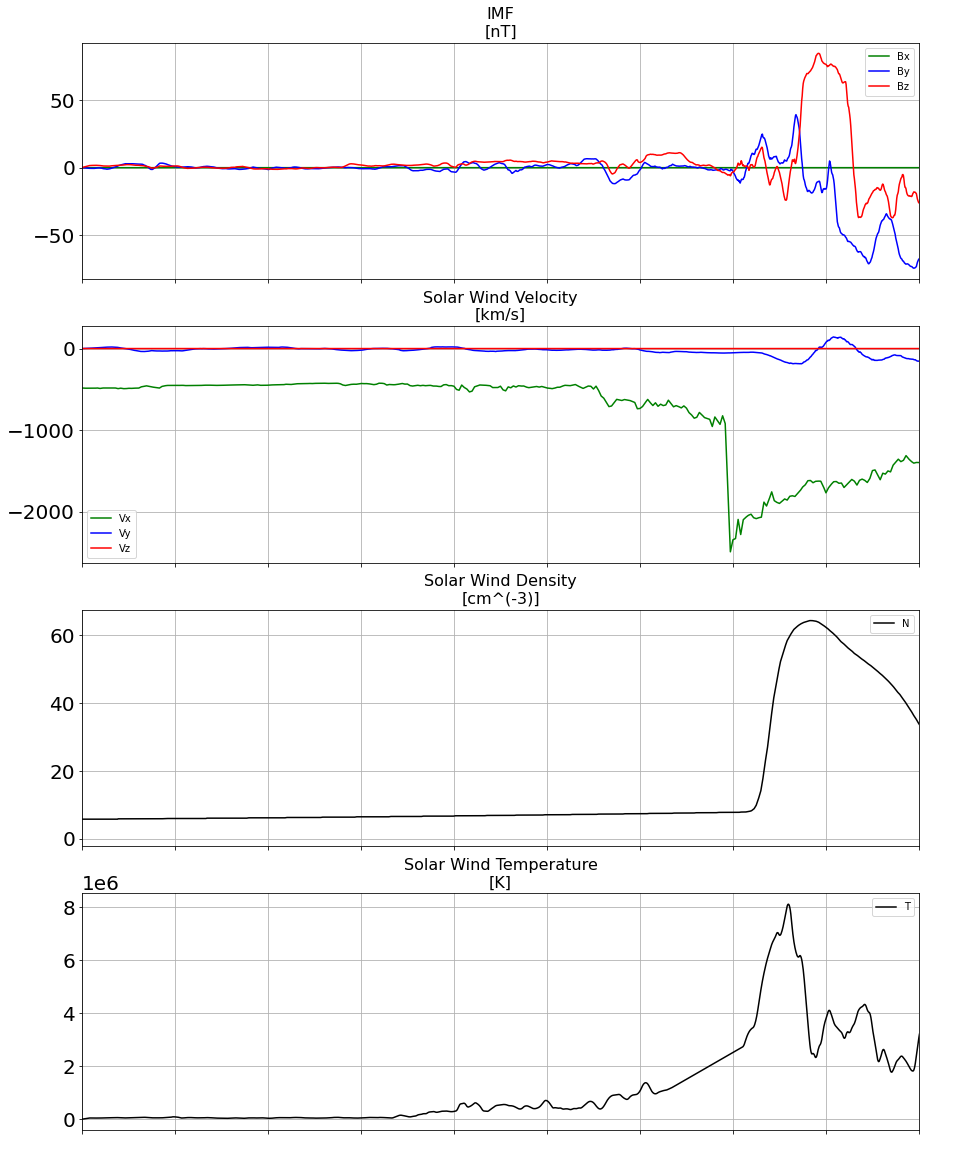

In [49]:
# Plotting solar wind

phase1_start = dt.datetime(2012,7,23,0)
phase1_end = dt.datetime(2012,7,23,18)
phase2_end = dt.datetime(2012,7,23,20)
phase3_end = dt.datetime(2012,7,24,3)
epilogue_end = dt.datetime(2012,7,25,0)

dt_low = phase1_start
dt_high = phase3_end


fig = plt.figure(figsize=(15,20))

ylim_low = -70
ylim_high = 70

ax1 = fig.add_subplot(411)
ax1.plot(pd_sw_event['datetimes'],
         pd_sw_event['Bx'],
         'g-',
         label='Bx')
ax1.plot(pd_sw_event['datetimes'],
         pd_sw_event['By'],
         'b-',
         label='By')
ax1.plot(pd_sw_event['datetimes'],
         pd_sw_event['Bz'],
         'r-',
         label='Bz')
plt.legend()
# ax1.axvspan(*mdates.date2num([phase1_start, phase1_end]), color='green', alpha=0.3)
# ax1.axvspan(*mdates.date2num([phase1_end, phase2_end]), color='orange', alpha=0.3)
# ax1.axvspan(*mdates.date2num([phase2_end, phase3_end]), color='red', alpha=0.3)
# ax1.axvspan(*mdates.date2num([phase3_end, epilogue_end]), color='black', alpha=0.3)


plt.xlim(dt_low,
         dt_high,)
plt.xticks(color='w')
# plt.ylim(ylim_low,ylim_high)

# plt.title(sw_label,
#          fontsize=15,)
plt.grid(True)
plt.title('IMF\n[nT]',fontsize=16,rotation=0)



ax2 = fig.add_subplot(412)
ax2.plot(pd_sw_event['datetimes'],
         pd_sw_event['Vx'],
         'g-',
         label='Vx')
ax2.plot(pd_sw_event['datetimes'],
         pd_sw_event['Vy'],
         'b-',
         label='Vy')
ax2.plot(pd_sw_event['datetimes'],
         pd_sw_event['Vz']*0.,
         'r-',
         label='Vz')
plt.legend()
plt.xlim(dt_low,
         dt_high,)
plt.xticks(color='w')

plt.grid(True)
plt.title('Solar Wind Velocity\n[km/s]',fontsize=16,rotation=0)


ax3 = fig.add_subplot(413)
ax3.plot(pd_sw_event['datetimes'],
         pd_sw_event['N'],
         'k-',
         label='N')
plt.legend()
plt.xlim(dt_low,
         dt_high,)
plt.xticks(color='w')

plt.grid(True)
plt.title('Solar Wind Density\n[cm^(-3)]',fontsize=16,rotation=0)




ax4 = fig.add_subplot(414)
ax4.plot(pd_sw_event['datetimes'],
         pd_sw_event['T'],
         'k-',
         label='T')
plt.legend()
plt.xlim(dt_low,
         dt_high,)


plt.grid(True)
# plt.xticks(rotation = 45)
plt.xticks(color='w')
plt.ylabel('')
plt.title('Solar Wind Temperature\n[K]',fontsize=16,rotation=0)




## Read in UMich SWMF Results

In [50]:
spwx_file = '/Users/ryanmcgranaghan/Documents/NSF_CHESS/Workshop/data/July2012_NearMiss/july2012_near_miss_0uz_swmf/mag_grid_e20120723-000000.out'
f = open(spwx_file)
spwx_event = f.read().split('\n')
f.close()
spwx_label = 'July 2012 near miss - Space Weather Results'





In [51]:
spwx_event

['Magnetometer grid (GEO) [deg] dB (North-East-Down) [nT]',
 '         0  0.0000000000E+00  2  0 17',
 '     180      86',
 'Lon Lat dBn dBe dBd dBnMhd dBeMhd dBdMhd dBnFac dBeFac dBdFac dBnHal dBeHal dBdHal dBnPed dBePed dBdPed LonSm LatSm',
 '  0.0000000000E+00 -8.5000000000E+01 -4.1308534576E+01  7.8714426676E+00  4.9638584691E+00  1.3497739506E-01  1.0740123376E+00 -2.5309454920E+00  1.1218557467E+01  7.7480692086E+00  1.8076827489E+00 -4.5137426567E+01  1.9049050173E+01  1.2908763958E+01 -7.5246428714E+00 -1.9999689052E+01 -7.2216427464E+00  1.3387645584E+02 -7.7705500809E+01',
 '  2.0000000000E+00 -8.5000000000E+01 -4.1138045614E+01  7.9024374239E+00  3.9742636305E+00  1.5166283113E-01  1.0685744579E+00 -2.5330544247E+00  1.1256498110E+01  7.7129710720E+00  1.7975689635E+00 -4.5002301456E+01  1.9120006480E+01  1.1965343973E+01 -7.5439050991E+00 -1.9999114586E+01 -7.2555948812E+00  1.3439884867E+02 -7.7840190959E+01',
 '  4.0000000000E+00 -8.5000000000E+01 -4.0853674846E+01  7.973

## Read in Balch GeoE field Results

## Read in Arritt GIC Results